Ex.5) 

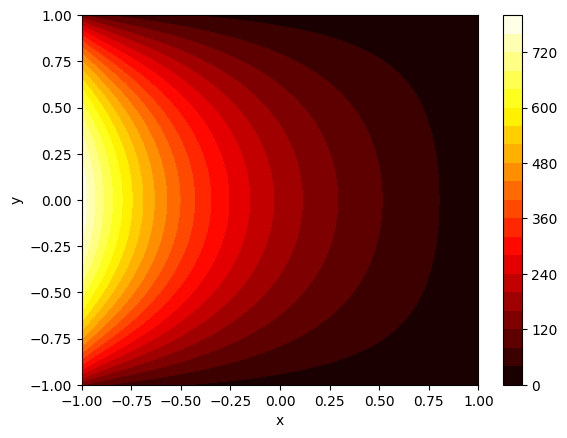

In [71]:
import numpy as np
import matplotlib.pyplot as plt

## Input data
#Geometry and material properties
Lix = -1 # m
Liy = -1 # m
Lfx = 1 # m
Lfy = 1 # m
k = 0.5 # W/(mK)
h = 10 # W/(m^2 K)

# Boundary conditions
q_bar = 500 # W/m^2
h = 10 # W/(m^2 K)
T_inf = 10 # K


## Discretization
Nx = 50 # spatial x
Ny = 50 # spatial y
x = np.linspace(Lix, Lfx, Nx)
y = np.linspace(Liy, Lfy, Ny)
dx = x[1] - x[0]
dy = y[1] - y[0]

# Intermediate constants
beta1 = k / (dx**2)
beta2 = k / (dy**2)

gamma1 = 2 * dx * q_bar / k
gamma2 = 2 * dx * h / k
gamma3 = 2 * dy * h / k

# Flatten important matrices 
[xg, yg] = np.meshgrid(x, y)
x = xg.flatten()
y = yg.flatten()

# print(xg)
# print(yg)
# print(x)
# print(y)

# regions
region_B = np.arange(0, Nx, 1)
region_R = np.arange(Nx - 1, Nx * Ny, Nx)
region_T = np.arange(Nx * (Ny - 1), Nx * Ny,1)
region_L = np.arange(0, Nx * (Ny - 1) + 1, Nx)

# Matrix A assembly
A = np.zeros((Nx*Ny,Nx*Ny))

for i, xi in enumerate(x):
    # Vertices
    if i in (set(region_L) & set(region_B)):
        A[i,i] = -(2 * beta1 + (2 + gamma3) * beta2)
        A[i,i+1] = 2 * beta1
        A[i,i+Nx] = 2 * beta2
    elif i in (set(region_L) & set(region_T)):
        A[i,i-Nx] = 2 * beta2
        A[i,i] = -(2 * beta1 + (gamma3 + 2) * beta2)
        A[i,i+1] = 2 * beta1
    elif i in (set(region_R) & set(region_B)):
        A[i,i-1] = 2 * beta1
        A[i,i] = -((gamma2 + 2) * beta1 + (2 + gamma3) * beta2)
        A[i,i+Nx] = 2 * beta2
    elif i in (set(region_R) & set(region_T)):
        A[i,i-Nx] = 2 * beta2
        A[i,i-1] = 2 * beta1
        A[i,i] = -((gamma2 + 2) * beta1 + (gamma3 + 2) * beta2)
    # Edges without vertices
    elif i in set(region_L) - (set(region_L) & set(region_B)) - (set(region_L) & set(region_T)):
        A[i,i-Nx] = beta2
        A[i,i] = -2 * (beta1 + beta2)
        A[i,i+1] = 2 * beta1
        A[i,i+Nx] = beta2
    elif i in set(region_R) - (set(region_R) & set(region_B)) - (set(region_R) & set(region_T)):
        A[i,i-Nx] = beta2
        A[i,i-1] = 2 * beta1
        A[i,i] = -((gamma2 + 2) * beta1 + 2 * beta2)
        A[i,i+Nx] = beta2
    elif i in set(region_B) - (set(region_B) & set(region_L)) - (set(region_B) & set(region_R)):
        A[i,i-1] = beta1
        A[i,i] = -(2 * beta1 + (2 + gamma3) * beta2)
        A[i,i+1] = beta1
        A[i,i+Nx] = 2 * beta2
    elif i in set(region_T) - (set(region_T) & set(region_L)) - (set(region_T) & set(region_R)):
        A[i,i-Nx] = 2 * beta2
        A[i,i-1] = beta1
        A[i,i] = -(2 * beta1 + (gamma3 + 2) * beta2)
        A[i,i+1] = beta1
    # Other positions
    else:
        A[i,i-Nx] = beta2
        A[i,i-1] = beta1
        A[i,i] = -2 * (beta1 + beta2)
        A[i,i+1] = beta1
        A[i,i+Nx] = beta2

Ainv = np.linalg.inv(A)

# print(A)

# Vector b assembly

b = np.zeros(Nx*Ny)

for i, xi in enumerate(x):
    # Vertices
    if i in (set(region_L) & set(region_B)):
        b[i] = -beta1 * gamma1 - beta2 * gamma3 * T_inf
    elif i in (set(region_L) & set(region_T)):
        b[i] = -beta1 * gamma1 - beta2 * gamma3 * T_inf
    elif i in (set(region_R) & set(region_B)):
        b[i] = -beta1 * gamma2 * T_inf - beta2 * gamma3 * T_inf
    elif i in (set(region_R) & set(region_T)):
        b[i] = -beta1 * gamma2 * T_inf - beta2 * gamma3 * T_inf
    # Edges without vertices
    elif i in set(region_L) - (set(region_L) & set(region_B)) - (set(region_L) & set(region_T)):
        b[i] = -beta1 * gamma1
    elif i in set(region_R) - (set(region_R) & set(region_B)) - (set(region_R) & set(region_T)):
        b[i] = -beta1 * gamma2 * T_inf 
    elif i in set(region_B) - (set(region_B) & set(region_L)) - (set(region_B) & set(region_R)):
        b[i] = -beta2 * gamma3 * T_inf
    elif i in set(region_T) - (set(region_T) & set(region_L)) - (set(region_T) & set(region_R)):
        b[i] = -beta2 * gamma3 * T_inf
    # Other positions
    else:
        b[i] = 0

# print(b)

# Solve the system
T = np.zeros((Nx*Ny,1))
T = Ainv @ b

# print(T)

Tmatrix = np.reshape(T,(Ny,Nx))

# print(Tmatrix)

plt.figure()
plt.contourf(xg, yg, Tmatrix, 20, cmap='hot')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()



Ex.6-a) Método Explícito

[[1.         1.00980327 1.01489744 ... 1.11762836 1.11761085 1.11759334]
 [1.         1.         1.00235455 ... 1.11759189 1.11757441 1.11755695]
 [1.         1.         1.         ... 1.11748263 1.11746526 1.1174479 ]
 ...
 [1.         1.         1.         ... 1.08241984 1.08243708 1.08245429]
 [1.         1.         1.         ... 1.08231149 1.08232883 1.08234615]
 [1.         1.         1.         ... 1.08227533 1.0822927  1.08231005]]


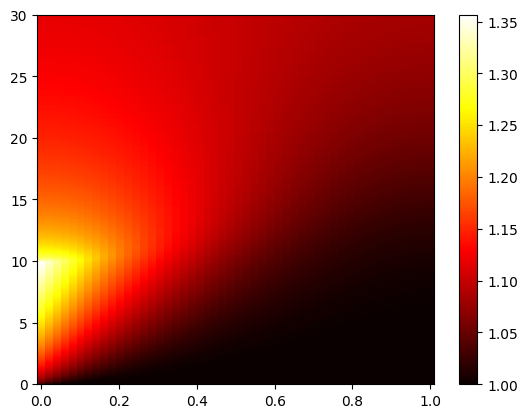

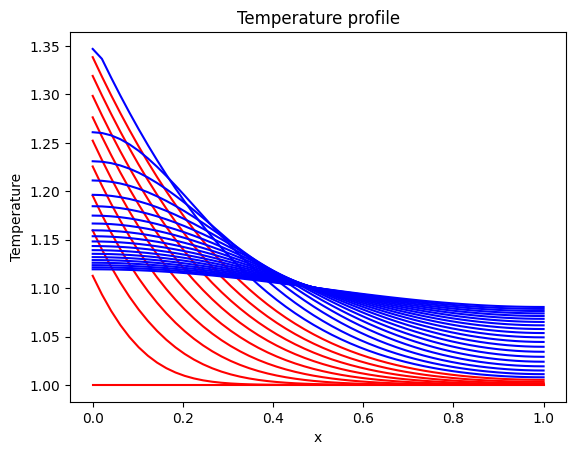

In [23]:
import numpy as np
import matplotlib.pyplot as plt

## Input data
#Geometry and material properties
L = 1
lamb = 0.01
#Boudary conditions
q = 1
# Initial conditions
T0 = 1
# Final time
tend = 30

## Discretization
N = 50 # spatial
Nt = 3000 # temporal
x = np.linspace(0, L, N)
t = np.linspace(0, tend, Nt)
dx = x[1] - x[0]
dt = t[1] - t[0]

beta = lamb * dt / (dx**2)

T = np.zeros((N,Nt))
for k, tk in enumerate(t):
    for i, xi in enumerate(x):
        if tk == 0:
            T[i,k] = T0
        else:
            if np.isclose(xi,0):
                if t[k] <= 10: 
                    T[i,k] = T[i,k-1] + beta * (2 * T[i+1,k-1] - 2 * T[i,k-1] + 2 * dx * q)
                else:
                     T[i,k] = T[i,k-1] + beta * (2 * T[i+1,k-1] - 2 * T[i,k-1])
            elif np.isclose(xi,L):
                T[i,k] = T[i,k-1] + beta * (2 * T[i-1,k-1] - 2 * T[i,k-1])
            else:
                T[i,k] = T[i,k-1] + beta * (T[i-1,k-1] - 2 * T[i,k-1] + T[i+1,k-1])


print(T)

plt.figure()
plt.pcolor(x,t,T.T,cmap='hot')
plt.colorbar()


# Plotting the solution
plt.figure()
for k,tk in enumerate(t):
    if k % 100 == 0:
        if tk <= 10:
            plt.plot(x,T[:,k],'r')
        else:
            plt.plot(x,T[:,k],'b')
    else:
        continue
plt.title('Temperature profile')
plt.xlabel('x')
plt.ylabel('Temperature')
plt.show()

Ex.6-b) Método Implícito

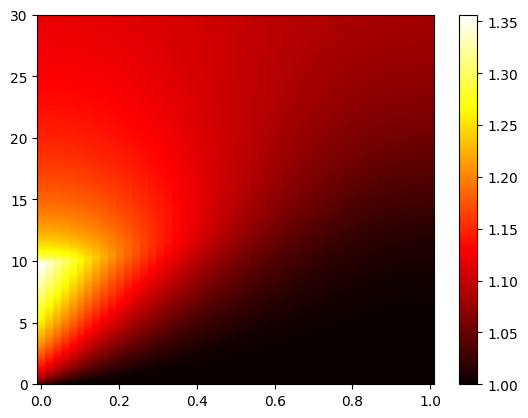

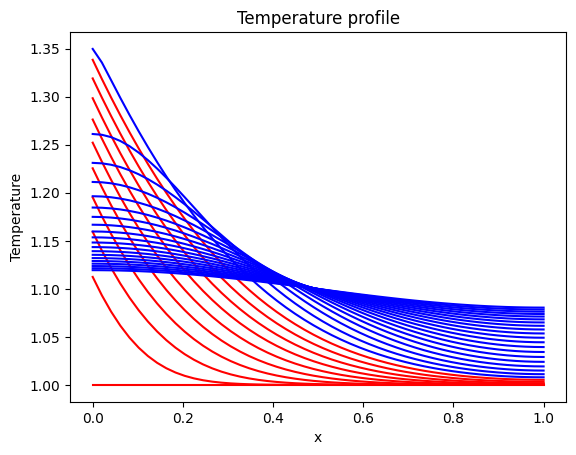

In [68]:
import numpy as np
import matplotlib.pyplot as plt

## Input data
#Geometry and material properties
L = 1
lamb = 0.01
#Boudary conditions
q = 1
# Initial conditions
T0 = 1
# Final time
tend = 30

## Discretization
N = 50 # spatial
Nt = 3000 # temporal
x = np.linspace(0, L, N)
t = np.linspace(0, tend, Nt)
dx = x[1] - x[0]
dt = t[1] - t[0]

beta = lamb * dt / (dx**2)

T = np.zeros((N,Nt))

# Matrix A assembly
A = np.zeros((N,N))

for i, xi in enumerate(x):
    if np.isclose(xi,0):
        A[i,i] = 2 * beta + 1
        A[i,i+1] = -2 * beta
    elif np.isclose(xi,L):
        A[i,i-1] = -2 * beta
        A[i,i] = 2 * beta + 1
    else:
        A[i,i-1] = -beta
        A[i,i+1] = -beta
        A[i,i] = 2 * beta + 1

Ainv = np.linalg.inv(A)

# print(A)

b = np.zeros(N)
# Solution
for k, tk in enumerate(t):
    if tk == 0:
        T[:,k] = T0
    else:
        b = list(T[:,k-1])
        if t[k] <= 10:
            b[0] = b[0] + 2 * beta * dx * q
            T[:,k] = Ainv @ b
        else:
            T[:,k] = Ainv @ b
            

# print(T)



plt.pcolor(x,t,T.T,cmap='hot')
plt.colorbar()

# Plotting the solution
plt.figure()
for k,tk in enumerate(t):
    if k % 100 == 0:
        if tk <= 10:
            plt.plot(x,T[:,k],'r')
        else:
            plt.plot(x,T[:,k],'b')
    else:
        continue
plt.title('Temperature profile')
plt.xlabel('x')
plt.ylabel('Temperature')
plt.show()





Ex.7-a) Método Explícito

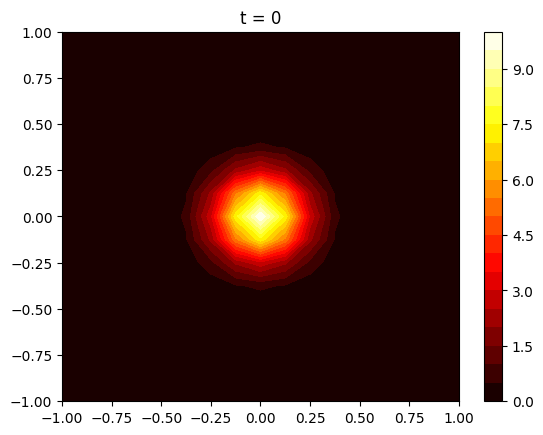

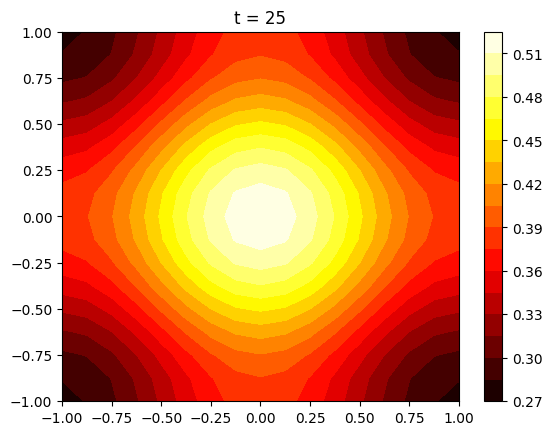

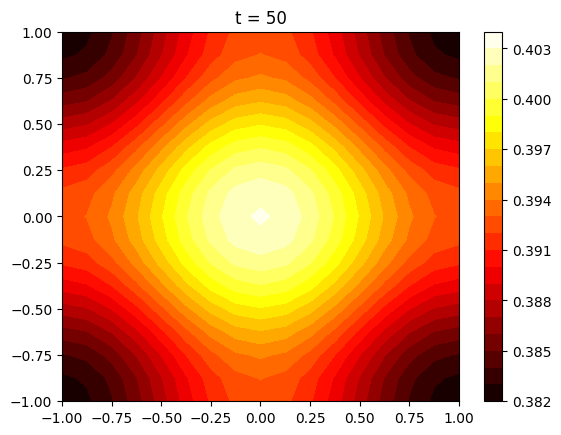

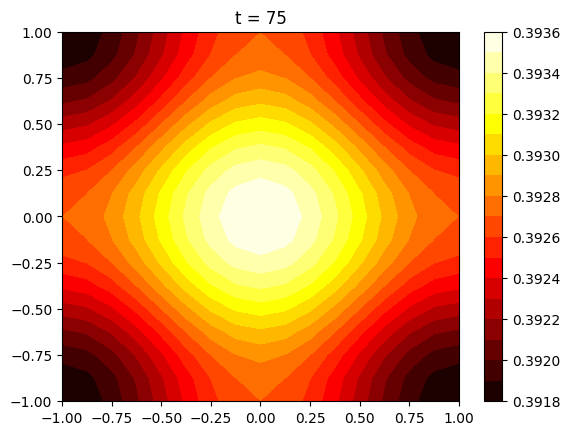

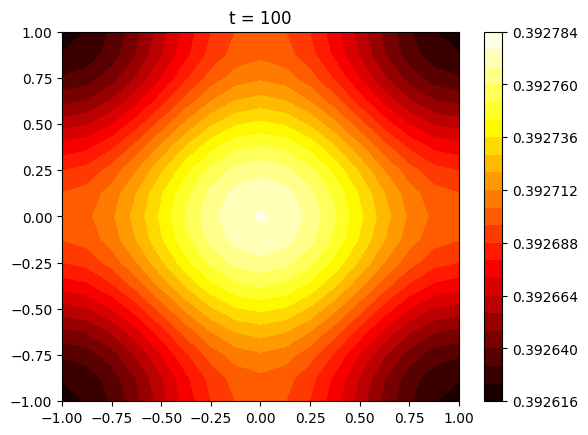

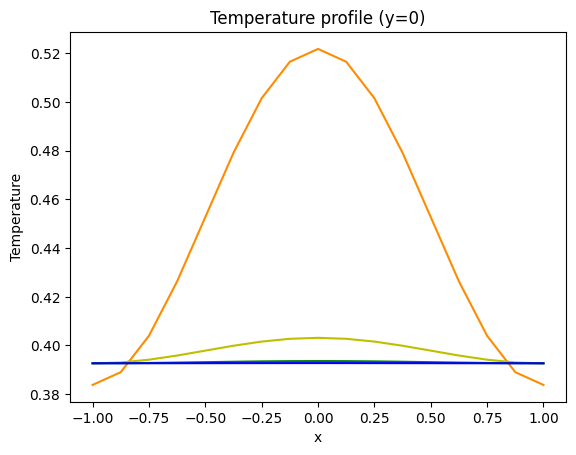

In [72]:
import numpy as np
import matplotlib.pyplot as plt

## Input data
#Geometry and material properties
Lix = -1
Liy = -1
Lfx = 1
Lfy = 1
lamb = 0.01

# Final time
tend = 100

## Discretization
Nx = 17 # spatial x
Ny = 17 # spatial y
Nt = 1001 # temporal
x = np.linspace(Lix, Lfx, Nx)
y = np.linspace(Liy, Lfy, Ny)
t = np.linspace(0, tend, Nt)
dx = x[1] - x[0]
dy = y[1] - y[0]
dt = t[1] - t[0]

beta1 = lamb * dt / (dx**2)
beta2 = lamb * dt / (dy**2)

# Initial conditions
T0 = np.zeros((Nx,Ny))
for i, xi in enumerate(x):
    for j, yj in enumerate(y):
        T0[i,j] = 10 * np.exp((-20) * (xi**2 + yj**2))

# Flatten important matrices 
[xg, yg] = np.meshgrid(x, y)
x = xg.flatten()
y = yg.flatten()
T0 = T0.flatten()

# print(xg)
# print(yg)
# print(x)
# print(y)


# regions
region_B = np.arange(0, Nx, 1)
region_R = np.arange(Nx - 1, Nx * Ny, Nx)
region_T = np.arange(Nx * (Ny - 1), Nx * Ny,1)
region_L = np.arange(0, Nx * (Ny - 1) + 1, Nx)

T = np.zeros((Nx*Ny,Nt))
for k, tk in enumerate(t):
    for i, xi in enumerate(x):
        if tk == 0:
            T[i,k] = T0[i]
        else:
            # Vertices
            if i in (set(region_L) & set(region_B)):
                T[i,k] = beta1 * (2 * T[i+1,k-1] - 2 * T[i,k-1]) + beta2 * (2 * T[i+Nx,k-1] - 2 * T[i,k-1]) + T[i,k-1]
            elif i in (set(region_L) & set(region_T)):
                T[i,k] = beta1 * (2 * T[i+1,k-1] - 2 * T[i,k-1]) + beta2 * (2 * T[i-Nx,k-1] - 2 * T[i,k-1]) + T[i,k-1]
            elif i in (set(region_R) & set(region_B)):
                T[i,k] = beta1 * (2 * T[i-1,k-1] - 2 * T[i,k-1]) + beta2 * (2 * T[i+Nx,k-1] - 2 * T[i,k-1]) + T[i,k-1]
            elif i in (set(region_R) & set(region_T)):
                T[i,k] = beta1 * (2 * T[i-1,k-1] - 2 * T[i,k-1]) + beta2 * (2 * T[i-Nx,k-1] - 2 * T[i,k-1]) + T[i,k-1]
            # Edges without vertices
            elif i in set(region_L) - (set(region_L) & set(region_B)) - (set(region_L) & set(region_T)):
                T[i,k] = beta1 * (2 * T[i+1,k-1] - 2 * T[i,k-1]) + beta2 * (T[i-Nx,k-1] - 2 * T[i,k-1] + T[i+Nx,k-1]) + T[i,k-1]
            elif i in set(region_R) - (set(region_R) & set(region_B)) - (set(region_R) & set(region_T)):
                T[i,k] = beta1 * (2 * T[i-1,k-1] - 2 * T[i,k-1]) + beta2 * (T[i-Nx,k-1] - 2 * T[i,k-1] + T[i+Nx,k-1]) + T[i,k-1]
            elif i in set(region_B) - (set(region_B) & set(region_L)) - (set(region_B) & set(region_R)):
                T[i,k] = beta1 * (T[i-1,k-1] - 2 * T[i,k-1] + T[i+1,k-1]) + beta2 * (2 * T[i+Nx,k-1] - 2 * T[i,k-1]) + T[i,k-1]
            elif i in set(region_T) - (set(region_T) & set(region_L)) - (set(region_T) & set(region_R)):
                T[i,k] = beta1 * (T[i-1,k-1] - 2 * T[i,k-1] + T[i+1,k-1]) + beta2 * (2 * T[i-Nx,k-1] - 2 * T[i,k-1]) + T[i,k-1]
            # Other positions
            else:
                T[i,k] = beta1 * (T[i-1,k-1] - 2 * T[i,k-1] + T[i+1,k-1]) + beta2 * (T[i-Nx,k-1] - 2 * T[i,k-1] + T[i+Nx,k-1])+ T[i,k-1] 

Tmatrix = np.zeros((Nt,Ny,Nx))
for k in range(Nt):
    Tmatrix[k,:,:] = np.reshape(T[:,k],(Ny,Nx))


plt.figure()
plt.contourf(xg, yg, Tmatrix[0,:,:], 20, cmap='hot')
plt.colorbar()
plt.title('t = 0')

plt.figure()
plt.contourf(xg, yg, Tmatrix[250,:,:], 20, cmap='hot')
plt.colorbar()
plt.title('t = 25')

plt.figure()
plt.contourf(xg, yg, Tmatrix[500,:,:], 20, cmap='hot')
plt.colorbar()
plt.title('t = 50')

plt.figure()
plt.contourf(xg, yg, Tmatrix[750,:,:], 20, cmap='hot')
plt.colorbar()
plt.title('t = 75')

plt.figure()
plt.contourf(xg, yg, Tmatrix[1000,:,:], 20, cmap='hot')
plt.colorbar()
plt.title('t = 100')

# Plotting the solution
xplot = np.linspace(Lix, Lfx, Nx)
yplot = np.linspace(Liy, Lfy, Ny)
plt.figure()
for k,tk in enumerate(t):
    # if tk == 0:
    #     plt.plot(xplot,Tmatrix[k,:,((Ny-1)//2)],'r')
    if tk == 25:
        plt.plot(xplot,Tmatrix[k,:,((Ny-1)//2)],'darkorange')
    elif tk == 50:
        plt.plot(xplot,Tmatrix[k,:,((Ny-1)//2)],'y')
    elif tk == 75:
        plt.plot(xplot,Tmatrix[k,:,((Ny-1)//2)],'g')
    elif tk == 100:
        plt.plot(xplot,Tmatrix[k,:,((Ny-1)//2)],'blue')
    else:
        continue
plt.title('Temperature profile (y=0)')
plt.xlabel('x')
plt.ylabel('Temperature')
plt.show()




Ex.7-b) Método Implícito

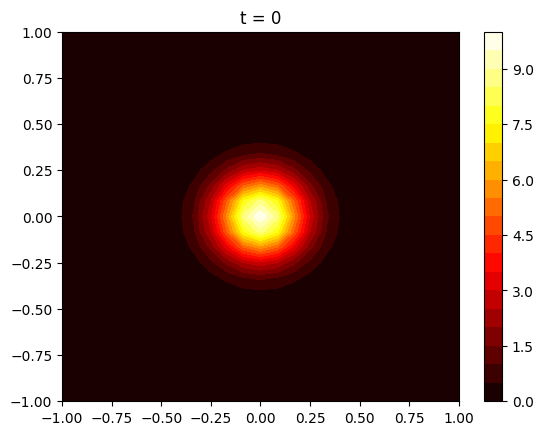

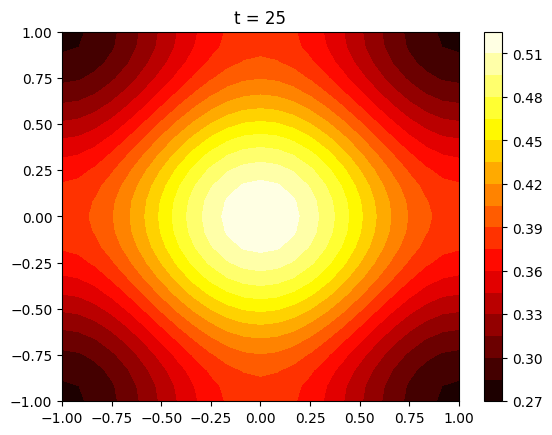

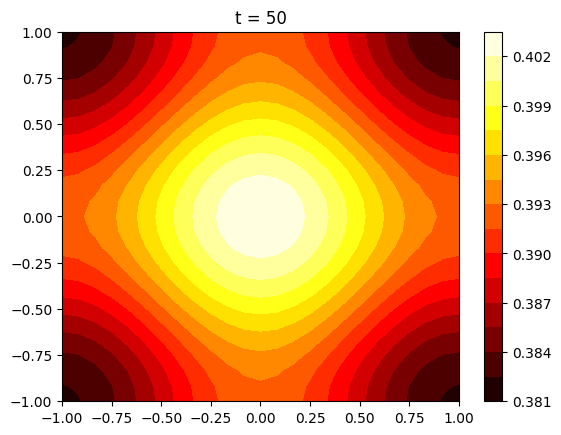

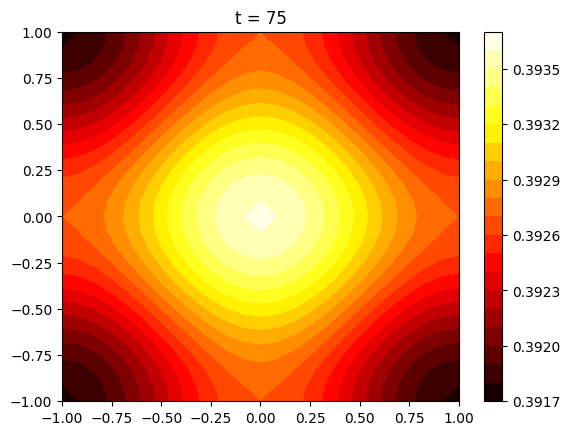

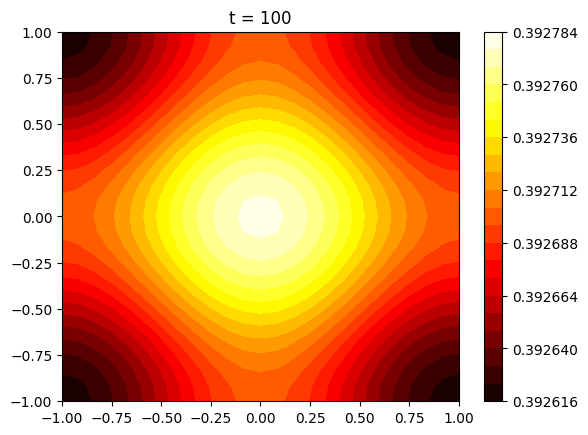

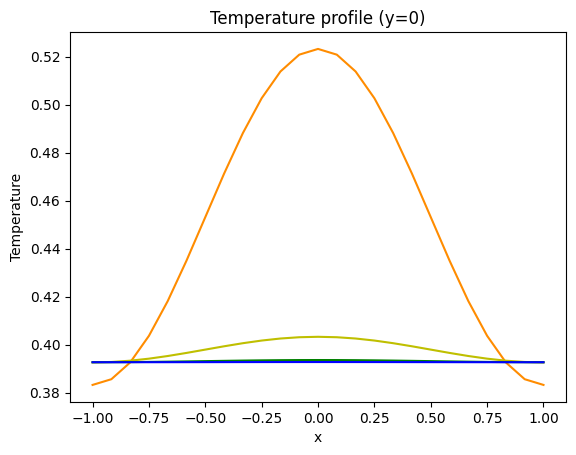

In [67]:
import numpy as np
import matplotlib.pyplot as plt

## Input data
#Geometry and material properties
Lix = -1
Liy = -1
Lfx = 1
Lfy = 1
lamb = 0.01

# Final time
tend = 100

## Discretization
Nx = 25 # spatial x
Ny = 25 # spatial y
Nt = 1001 # temporal
x = np.linspace(Lix, Lfx, Nx)
y = np.linspace(Liy, Lfy, Ny)
t = np.linspace(0, tend, Nt)
dx = x[1] - x[0]
dy = y[1] - y[0]
dt = t[1] - t[0]

beta1 = lamb * dt / (dx**2)
beta2 = lamb * dt / (dy**2)

# Initial conditions
T0 = np.zeros((Nx,Ny))
for i, xi in enumerate(x):
    for j, yj in enumerate(y):
        T0[i,j] = 10 * np.exp((-20) * (xi**2 + yj**2))

# Flatten important matrices 
[xg, yg] = np.meshgrid(x, y)
x = xg.flatten()
y = yg.flatten()
T0 = T0.flatten()

# print(xg)
# print(yg)
# print(x)
# print(y)

# regions
region_B = np.arange(0, Nx, 1)
region_R = np.arange(Nx - 1, Nx * Ny, Nx)
region_T = np.arange(Nx * (Ny - 1), Nx * Ny,1)
region_L = np.arange(0, Nx * (Ny - 1) + 1, Nx)

# Matrix A assembly
A = np.zeros((Nx*Ny,Nx*Ny))

for i, xi in enumerate(x):
    # Vertices
    if i in (set(region_L) & set(region_B)):
        A[i,i] = 2 * beta1 + 2 * beta2 + 1
        A[i,i+1] = -2* beta1
        A[i,i+Nx] = -2 * beta2
    elif i in (set(region_L) & set(region_T)):
        A[i,i-Nx] = -2 * beta2
        A[i,i] = 2 * beta1 + 2 * beta2 + 1
        A[i,i+1] = -2* beta1
    elif i in (set(region_R) & set(region_B)):
        A[i,i-1] = -2 * beta1
        A[i,i] = 2 * beta1 + 2 * beta2 + 1
        A[i,i+Nx] = -2 * beta2
    elif i in (set(region_R) & set(region_T)):
        A[i,i-Nx] = -2 * beta2
        A[i,i-1] = -2 * beta1
        A[i,i] = 2 * beta1 + 2 * beta2 + 1
    # Edges without vertices
    elif i in set(region_L) - (set(region_L) & set(region_B)) - (set(region_L) & set(region_T)):
        A[i,i-Nx] = -beta2
        A[i,i] = 2 * beta1 + 2 * beta2 + 1
        A[i,i+1] = -2* beta1
        A[i,i+Nx] = -beta2
    elif i in set(region_R) - (set(region_R) & set(region_B)) - (set(region_R) & set(region_T)):
        A[i,i-Nx] = -beta2
        A[i,i-1] = -2 * beta1
        A[i,i] = 2 * beta1 + 2 * beta2 + 1
        A[i,i+Nx] = -beta2
    elif i in set(region_B) - (set(region_B) & set(region_L)) - (set(region_B) & set(region_R)):
        A[i,i-1] = -beta1
        A[i,i] = 2 * beta1 + 2 * beta2 + 1
        A[i,i+1] = -beta1
        A[i,i+Nx] = -2 * beta2
    elif i in set(region_T) - (set(region_T) & set(region_L)) - (set(region_T) & set(region_R)):
        A[i,i-Nx] = -2 * beta2
        A[i,i-1] = -beta1
        A[i,i] = 2 * beta1 + 2 * beta2 + 1
        A[i,i+1] = -beta1
    # Other positions
    else:
        A[i,i-Nx] = -beta2
        A[i,i-1] = -beta1
        A[i,i] = 2 * beta1 + 2 * beta2 + 1
        A[i,i+1] = -beta1
        A[i,i+Nx] = -beta2

Ainv = np.linalg.inv(A)

# print(A)

T = np.zeros((Nx*Ny,Nt))
b = np.zeros(Nx*Ny)
# Solution
for k, tk in enumerate(t):
    if tk == 0:
        T[:,k] = T0
    else:
        b = list(T[:,k-1])
        T[:,k] = Ainv @ b


Tmatrix = np.zeros((Nt,Ny,Nx))
for k in range(Nt):
    Tmatrix[k,:,:] = np.reshape(T[:,k],(Ny,Nx))

plt.figure()
plt.contourf(xg, yg, Tmatrix[0,:,:], 20, cmap='hot')
plt.colorbar()
plt.title('t = 0')

plt.figure()
plt.contourf(xg, yg, Tmatrix[250,:,:], 20, cmap='hot')
plt.colorbar()
plt.title('t = 25')

plt.figure()
plt.contourf(xg, yg, Tmatrix[500,:,:], 20, cmap='hot')
plt.colorbar()
plt.title('t = 50')

plt.figure()
plt.contourf(xg, yg, Tmatrix[750,:,:], 20, cmap='hot')
plt.colorbar()
plt.title('t = 75')

plt.figure()
plt.contourf(xg, yg, Tmatrix[1000,:,:], 20, cmap='hot')
plt.colorbar()
plt.title('t = 100')

# Plotting the solution
xplot = np.linspace(Lix, Lfx, Nx)
yplot = np.linspace(Liy, Lfy, Ny)
plt.figure()
for k,tk in enumerate(t):
    # if tk == 0:
    #     plt.plot(xplot,Tmatrix[k,:,((Ny-1)//2)],'r')
    if tk == 25:
        plt.plot(xplot,Tmatrix[k,:,((Ny-1)//2)],'darkorange')
    elif tk == 50:
        plt.plot(xplot,Tmatrix[k,:,((Ny-1)//2)],'y')
    elif tk == 75:
        plt.plot(xplot,Tmatrix[k,:,((Ny-1)//2)],'g')
    elif tk == 100:
        plt.plot(xplot,Tmatrix[k,:,((Ny-1)//2)],'blue')
    else:
        continue
plt.title('Temperature profile (y=0)')
plt.xlabel('x')
plt.ylabel('Temperature')
plt.show()